<a href="https://colab.research.google.com/github/akarsh1207/Time-Series-Forecasting-and-Filtering/blob/main/Lorenz_%2B_Rosslers_Attractors_%2B_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lorenz/Rossler Attractor with Noise
___

##Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install colorednoise
import colorednoise as cn
import pdb
plt.close('all')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Parameter definitions

In [2]:
"""

	Parameters
	----------
	system : string
		Type of system to solve (`lorenz_stochastic`, `rossler_stochastic`, or
	   `noise`). The default is `lorenz_stochastic`.
	observables : list
		Which variables are observed (0 is x, 1 is y, 2 is z).
		The default is [0].
	length : int
		Time series length. The default is 10000.
	x0 : list
		Starting condition. If None, a random starting condition is selected.
		The default is None.
	p : list
		List of system parameters. The default is for the Lorenz system:
		[10.0, 8.0/3.0, 28.0].
	step : int
		Integration step. The default is 0.001.
	sample : int
		Temporal sampling at output. The default is 0.03.
	discard : int
		Number of steps to discard at the beginning. The default is 1000.
	epsilon_sde : float
		Intensity of noise perturbing the dynamics. The default is 0.0.
	epsilon_add : float
		Intensity of observational noise. The default is 0.0.
	beta_add : int
		Exponent to characterize the power spectrum of the observational noise.
		For white noise beta_add = 0.0 (gaussian).
		For pink noise beta_add = 1.0 (flicker).
		For red noise beta_add = 2.0 (Browinan).
		The default is 0.0.

	Returns
	-------
	t_obs : array
		Time stamps at which the observation is taken.
	X_obs : 2-d array
		Observed time series.
	t_gen : array
		Time stamps at which the system has been integrated.
	X_gen : 2-d array
		Generated time series (i.e., without observational noise added).

	"""

'\n\n\tParameters\n\t----------\n\tsystem : string\n\t\tType of system to solve (`lorenz_stochastic`, `rossler_stochastic`, or\n\t   `noise`). The default is `lorenz_stochastic`.\n\tobservables : list\n\t\tWhich variables are observed (0 is x, 1 is y, 2 is z).\n\t\tThe default is [0].\n\tlength : int\n\t\tTime series length. The default is 10000.\n\tx0 : list\n\t\tStarting condition. If None, a random starting condition is selected.\n\t\tThe default is None.\n\tp : list\n\t\tList of system parameters. The default is for the Lorenz system:\n\t\t[10.0, 8.0/3.0, 28.0].\n\tstep : int\n\t\tIntegration step. The default is 0.001.\n\tsample : int\n\t\tTemporal sampling at output. The default is 0.03.\n\tdiscard : int\n\t\tNumber of steps to discard at the beginning. The default is 1000.\n\tepsilon_sde : float\n\t\tIntensity of noise perturbing the dynamics. The default is 0.0.\n\tepsilon_add : float\n\t\tIntensity of observational noise. The default is 0.0.\n\tbeta_add : int\n\t\tExponent to 

## Lorenz Stochastic

In [3]:
def _gen_lorenz_stochastic(length=10000, x0=None, sigma=10.0, \
						beta=8.0/3.0, rho=28.0,step=0.001, \
						sample=0.03, discard=1000, \
						epsilon_sde=0.0, observables=[0]):

	if not x0:
		x0 = (0.0, -0.01, 9.0) + 0.25 * (-1 + 2 * np.random.random(3))

	sample = int(sample / step)
	t = np.linspace(0, (sample * (length + discard)) * step, \
								  sample * (length + discard))
	Nt_simulation = len(t)
	X = np.zeros((Nt_simulation,3))
	X[0,:] = x0

	for tt in range(Nt_simulation-1):
		r = np.random.randn(3)
		X[tt+1,0] = X[tt,0] + (sigma * (X[tt,1] - X[tt,0])) * \
			step + epsilon_sde*np.sqrt(step)*r[0]
		X[tt+1,1] = X[tt,1] + (X[tt,0] * (rho - X[tt,2]) - \
			X[tt,1])*step + epsilon_sde*np.sqrt(step)*r[1]
		X[tt+1,2] = X[tt,2] + (X[tt,0] * X[tt,1] - beta * X[tt,2]) * \
			step + epsilon_sde*np.sqrt(step)*r[2]
	t_gen = t[discard*sample:]
	t_gen = t_gen-t_gen[0]
	X_gen = X[discard*sample:,:]
	t_obs = t[discard*sample::sample]
	t_obs = t_obs-t_obs[0]
	X_obs = X[discard*sample::sample, observables]
	return t_obs,X_obs,t_gen,X_gen


In [4]:
A = _gen_lorenz_stochastic()
print(A)

(array([0.00000000e+00, 3.00000909e-02, 6.00001818e-02, ...,
       2.99910909e+02, 2.99940909e+02, 2.99970909e+02]), array([[-3.16019939],
       [-3.22664003],
       [-3.45874779],
       ...,
       [-1.54329096],
       [-1.90279435],
       [-2.34818367]]), array([0.00000000e+00, 1.00000303e-03, 2.00000606e-03, ...,
       2.99997909e+02, 2.99998909e+02, 2.99999909e+02]), array([[-3.16019939, -3.10156595, 20.89062026],
       [-3.15961306, -3.12093144, 20.84471351],
       [-3.15922624, -3.14041844, 20.79898854],
       ...,
       [-2.85172143, -4.94254331, 12.75165678],
       [-2.87262965, -4.98108479, 12.73174712],
       [-2.8937142 , -5.01996374, 12.7121046 ]]))


In [5]:
a = A[3]
x1 = a[:,0]
y1 = a[:,1]
z1 = a[:,2]

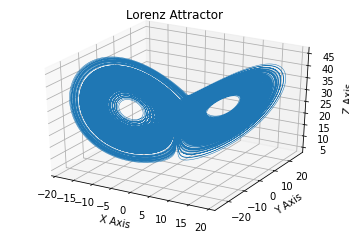

In [6]:
Visualisation = plt.figure().add_subplot(projection='3d')

Visualisation.plot(x1,y1,z1, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor")

plt.show()

##Rossler Stochastic

In [7]:
def _gen_rossler_stochastic(length=10000, x0=None, a=0.2, b=0.2, c=5.7, \
						 step=0.001, sample=0.03, discard=1000, \
						 epsilon_sde=0.0, observables=[0]):

	if not x0:
		x0 = (-9.0, 0.0, 0.0) + 0.25 * (-1 + 2 * np.random.random(3))

	sample = int(sample / step)
	t = np.linspace(0, (sample * (length + discard)) * step, \
			  sample * (length + discard))

	Nt_simulation = len(t)
	X = np.zeros((Nt_simulation,3))
	X[0,:] = x0

	for tt in range(Nt_simulation-1):
		r = np.random.randn(1)
		X[tt+1,0] = X[tt,0] - (X[tt,1] + X[tt,2])*step + \
									epsilon_sde*np.sqrt(step)*r[0]
		X[tt+1,1] = X[tt,1] + (X[tt,0] + a*X[tt,1])*step
		X[tt+1,2] = X[tt,2] + (b + X[tt,2] * (X[tt,0]-c)) * step
		if np.isnan(X[tt+1,0]):
			pdb.set_trace()
		if np.isnan(X[tt+1,1]):
			pdb.set_trace()
		if np.isnan(X[tt+1,2]):
			pdb.set_trace()
	t_gen = t[discard*sample:]
	t_gen = t_gen-t_gen[0]
	X_gen = X[discard*sample:,:]
	t_obs = t[discard*sample::sample]
	t_obs = t_obs-t_obs[0]
	X_obs = X[discard*sample::sample, observables]

	return t_obs,X_obs,t_gen,X_gen

In [8]:
B = _gen_rossler_stochastic()
print(B)

(array([0.00000000e+00, 3.00000909e-02, 6.00001818e-02, ...,
       2.99910909e+02, 2.99940909e+02, 2.99970909e+02]), array([[-1.53097681],
       [-1.35288648],
       [-1.17250922],
       ...,
       [ 5.09123786],
       [ 5.06282103],
       [ 5.02960929]]), array([0.00000000e+00, 1.00000303e-03, 2.00000606e-03, ...,
       2.99997909e+02, 2.99998909e+02, 2.99999909e+02]), array([[-1.53097681, -5.92329769,  0.02535658],
       [-1.52507887, -5.92601333,  0.02537322],
       [-1.51917823, -5.92872361,  0.0253899 ],
       ...,
       [ 4.99562566,  1.15987283,  0.17313044],
       [ 4.99429265,  1.16510043,  0.1732085 ],
       [ 4.99295434,  1.17032775,  0.17328626]]))


In [9]:
b = B[3]
x2 = b[:,0]
y2 = b[:,1]
z2 = b[:,2]

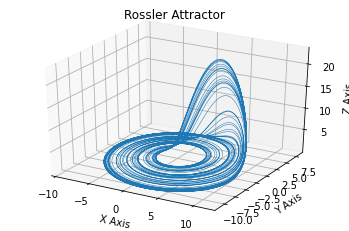

In [10]:
Visualisation = plt.figure().add_subplot(projection='3d')

Visualisation.plot(x2,y2,z2, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Rossler Attractor")

plt.show()

##Generation function

In [11]:
def _gen_data(system='lorenz_stochastic', observables=[0], \
		   length=10000, x0=None, p=[ 10,8.0/3.0, 28], step=0.001, \
		   sample=0.03, discard=1000, epsilon_sde=0.0, epsilon_add=0.0, \
		   beta_add=0.0):
		
	if system=='lorenz_stochastic':
		t_obs, X_obs, t_gen, X_gen = \
						_gen_lorenz_stochastic(length=length, \
							   x0=x0, sigma=p[0], beta=p[1], rho=p[2],\
							   step=step, sample=sample, \
							   discard=discard, \
							   epsilon_sde=epsilon_sde, \
							   observables=observables)
	elif system=='rossler_stochastic':
		t_obs, X_obs, t_gen, X_gen = \
						_gen_rossler_stochastic(length=length, \
							   x0=x0, a=p[0], b=p[1], c=p[2], \
							   step=step, sample=sample, \
							   discard=discard, \
							   epsilon_sde=epsilon_sde, \
							   observables=observables)
	elif system=='noise':
		Nx = len(observables)
		t_obs = np.arange(0,length*sample,sample)
		X_obs = np.zeros((t_obs.shape[0],Nx))
		t_gen = np.arange(0,length*step,step)
		X_gen = np.zeros((t_gen.shape[0],Nx))

	Nt,Nx = X_obs.shape
	for ii in np.arange(Nx):
		X_obs[:,ii] = X_obs[:,ii] + \
				epsilon_add * cn.powerlaw_psd_gaussian(beta_add, Nt)
	
	return t_obs, X_obs, t_gen, X_gen

In [12]:
C = _gen_data()
print(C)

(array([0.00000000e+00, 3.00000909e-02, 6.00001818e-02, ...,
       2.99910909e+02, 2.99940909e+02, 2.99970909e+02]), array([[ 6.59993022],
       [ 9.02062677],
       [12.03738705],
       ...,
       [ 9.89247667],
       [11.71527217],
       [13.37665143]]), array([0.00000000e+00, 1.00000303e-03, 2.00000606e-03, ...,
       2.99997909e+02, 2.99998909e+02, 2.99999909e+02]), array([[ 6.59993022, 13.67275963,  5.0966513 ],
       [ 6.67065851, 13.81024738,  5.17329949],
       [ 6.7420544 , 13.94870625,  5.25162746],
       ...,
       [14.41417753, 16.99970698, 32.22716281],
       [14.44003282, 16.9217762 , 32.38626051],
       [14.46485025, 16.84151668, 32.54424815]]))


In [13]:
c = C[3]
x3 = c[:,0]
y3 = c[:,1]
z3 = c[:,2]
print(C[1])
print(C[1].shape)

[[ 6.59993022]
 [ 9.02062677]
 [12.03738705]
 ...
 [ 9.89247667]
 [11.71527217]
 [13.37665143]]
(10000, 1)


In [14]:
print(C[3])
print(C[3].shape)

[[ 6.59993022 13.67275963  5.0966513 ]
 [ 6.67065851 13.81024738  5.17329949]
 [ 6.7420544  13.94870625  5.25162746]
 ...
 [14.41417753 16.99970698 32.22716281]
 [14.44003282 16.9217762  32.38626051]
 [14.46485025 16.84151668 32.54424815]]
(300000, 3)


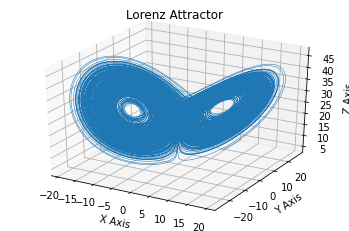

In [15]:
Visualisation = plt.figure().add_subplot(projection='3d')

Visualisation.plot(x3,y3,z3, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor")

plt.show()

##Plots

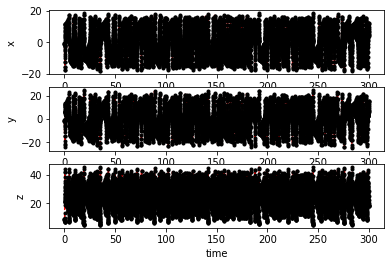

In [16]:
def main():
	t_obs, X_obs, t_gen, X_gen = _gen_data(system='lorenz_stochastic',
											observables=[0,1,2],
											length=10000,
											x0=None,
											p=[10, 8.0/3.0, 28],
											step=0.001,
											sample=0.03,
											discard=1000,
											epsilon_sde=0.0,
											epsilon_add=0.0,
											beta_add=0.0)
	ylabel = ['x','y','z']
	plt.figure()
	for ii in range(3):
		plt.subplot(3,1,ii+1)
		plt.plot(t_gen, X_gen[:,ii],'--r')
		plt.plot(t_obs, X_obs[:,ii],'.k')
		plt.ylabel(ylabel[ii])
		if ii==2: plt.xlabel('time')
	
if __name__ == '__main__':
	main()

#Extension to the Code
___

##Forming a Univariate Series for X Y Z generated:

In [17]:
def univariate_series(sequence, n_steps):
  X1, Y1 = list(), list()
  for i in range(300000):
    end_input = i + n_steps
    if end_input > 299989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X1.append(seq_x)
    Y1.append(seq_y)
  return np.array(X1), np.array(Y1)

X1, Y1 = univariate_series(x3,100)

In [18]:
def univariate_series(sequence, n_steps):
  X2, Y2 = list(), list()
  for i in range(300000):
    end_input = i + n_steps
    if end_input > 299989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X2.append(seq_x)
    Y2.append(seq_y)
  return np.array(X2), np.array(Y2)

X2, Y2 = univariate_series(y3,100)

In [19]:
def univariate_series(sequence, n_steps):
  X3, Y3 = list(), list()
  for i in range(300000):
    end_input = i + n_steps
    if end_input > 299989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X3.append(seq_x)
    Y3.append(seq_y)
  return np.array(X3), np.array(Y3)

X3, Y3 = univariate_series(z3,100)

##Input Vector Creation

In [20]:
New_X = np.stack([X1,X2,X3], axis=1)
New_Y = np.stack([Y1,Y2,Y3], axis=1)

##Train - Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(New_X, New_Y, test_size = 0.2, random_state = 0)

#MLP Model Unfiltered
___

##MLP Model

In [22]:
import tensorflow as tf 
mlp = tf.keras.models.Sequential()
mlp.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp.add(tf.keras.layers.Dense(units=10))
mlp.compile(optimizer = 'adam', loss = 'mse')
mlp.fit(X_train,y_train, batch_size = 99, epochs = 100)

Epoch 1/100
4799/4799 [==============================] - 11s 2ms/step - loss: 33.8398
Epoch 2/100
4799/4799 [==============================] - 8s 2ms/step - loss: 8.6224
Epoch 3/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.3327
Epoch 4/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.0659
Epoch 5/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.0547
Epoch 6/100
4799/4799 [==============================] - 8s 2ms/step - loss: 0.0565
Epoch 7/100
4799/4799 [==============================] - 8s 2ms/step - loss: 0.0529
Epoch 8/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.0547
Epoch 9/100
4799/4799 [==============================] - 10s 2ms/step - loss: 0.0531
Epoch 10/100
4799/4799 [==============================] - 11s 2ms/step - loss: 0.0491
Epoch 11/100
4799/4799 [==============================] - 11s 2ms/step - loss: 0.0384
Epoch 12/100
4799/4799 [==============================] - 10s 2ms/ste

## Predicted Values Extraction

In [23]:
predicted_values = mlp.predict(X_test)
actual_values = (y_test)
def unstack(a, axis=0):
    return np.moveaxis(a, axis, 0)
X_pred,Y_pred,Z_pred = unstack(predicted_values, axis=1)
X_ac,Y_ac,Z_ac = unstack(actual_values, axis =1)
print(predicted_values.shape)

(59978, 3, 10)


#L1 , L2 and H1 Error Metrics 

In [153]:
Loss1 = abs(predicted_values - actual_values)
L1 = 0
for i in range (59978):
  for j in range(3):
    for k in range(10):
      L1 = L1 + Loss1[i][j][k]
L1_averaged = L1/10
print(L1_averaged)

8507.32702162021


In [154]:
Loss2 = predicted_values - actual_values
L2=0
for i in range (59978):
  for j in range(3):
    for k in range(10):
      L2 = L2 + (Loss2[i][j][k])*(Loss2[i][j][k])
L2_averaged = L2/10
print(L2_averaged)

761.654094090102


In [157]:
Huber = predicted_values - actual_values
H1=0
delta = 0.01
for i in range (59978):
  for j in range(3):
    for k in range(10):
      if abs(Huber[i][j][k]) <= delta :
        H1 = H1 + 0.5*((Huber[i][j][k])*(Huber[i][j][k]))
      else:
        H1 = H1 + delta*Huber[i][j][k] - 0.5*delta*delta
Huber_averaged = H1/10
print(Huber_averaged)

-68.86742976907915


#Moving Average Filter - MLP Model
___

##Formula being Used -> Moving Window of size 15 used:
####Causal -> X(t) = [x(t) + x(t-1) ... + x(t-14)]/15 
####Non - Causal -> X(t) = [x(t-7) + x(t-6)... + x(t)... + x(t+6) + x(t+7)]/15




##Formation of the Causal and Non-Causal X Y Z values

In [93]:
x3_cs= np.zeros(300000)
for i in range (14,300000):
  x3_cs[i] = (x3[i] + x3[i-1] + x3[i-2] + x3[i-3] + x3[i-4] + x3[i-5] + x3[i-6] + x3[i-7] + x3[i-8] + x3[i-9] + x3[i-10] + x3[i-11] + x3[i-12] + x3[i-13] +x3[i-14])/15


In [61]:
y3_cs= np.zeros(300000)
for i in range (14,300000):
  y3_cs[i] = (y3[i] + y3[i-1] + y3[i-2] + y3[i-3] + y3[i-4] + y3[i-5] + y3[i-6] + y3[i-7] + y3[i-8] + y3[i-9] + y3[i-10] + y3[i-11] + y3[i-12] + y3[i-13] +y3[i-14])/15


In [62]:
z3_cs= np.zeros(300000)
for i in range (14,300000):
  z3_cs[i] = (z3[i] + z3[i-1] + z3[i-2] + z3[i-3] + z3[i-4] + z3[i-5] + z3[i-6] + z3[i-7] + z3[i-8] + z3[i-9] + z3[i-10] + z3[i-11] + z3[i-12] + z3[i-13] +z3[i-14])/15

In [63]:
x3_ncs= np.zeros(300000)
for i in range (7,299993):
  x3_ncs[i] = (x3[i] + x3[i-1] + x3[i-2] + x3[i-3] + x3[i-4] + x3[i-5] + x3[i-6] + x3[i-7] + x3[i+7] + x3[i+1] + x3[i+2] + x3[i+3] + x3[i+4] + x3[i+5] +x3[i+6])/15


In [64]:
y3_ncs= np.zeros(300000)
for i in range (7,299993):
  y3_ncs[i] = (y3[i] + y3[i-1] + y3[i-2] + y3[i-3] + y3[i-4] + y3[i-5] + y3[i-6] + y3[i-7] + y3[i+7] + y3[i+1] + y3[i+2] + y3[i+3] + y3[i+4] + y3[i+5] +y3[i+6])/15


In [65]:
z3_ncs= np.zeros(300000)
for i in range (7,299993):
  z3_ncs[i] = (z3[i] + z3[i-1] + z3[i-2] + z3[i-3] + z3[i-4] + z3[i-5] + z3[i-6] + z3[i-7] + z3[i+7] + z3[i+1] + z3[i+2] + z3[i+3] + z3[i+4] + z3[i+5] + z3[i+6])/15

##0 -> nan

In [94]:
count=0
for i in range (300000):
  if x3_cs[i]==0:
    x3_cs[i]=np.nan
    count= count + 1
print(count)
for i in range (300000):
  if y3_cs[i]==0:
    y3_cs[i]=np.nan
    count= count + 1
for i in range (300000):
  if z3_cs[i]==0:
    z3_cs[i]=np.nan
    count= count + 1
for i in range (300000):
  if x3_ncs[i]==0:
    x3_ncs[i]=np.nan
    count= count + 1
for i in range (300000):
  if y3_ncs[i]==0:
    y3_ncs[i]=np.nan
    count= count + 1
for i in range (300000):
  if z3_ncs[i]==0:
    z3_ncs[i]=np.nan
    count= count + 1

14


##Replacing nan values

In [120]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = 'mean')

x3_cs = x3_cs.reshape(-1,1)
imputer.fit(x3_cs)
x3_cs = imputer.transform(x3_cs)
x3_cs = x3_cs.reshape(1,-1)
x3_cs = x3_cs[0]

y3_cs = y3_cs.reshape(-1,1)
imputer.fit(y3_cs)
y3_cs = imputer.transform(y3_cs)
y3_cs = y3_cs.reshape(1,-1)
y3_cs = y3_cs[0]

z3_cs = z3_cs.reshape(-1,1)
imputer.fit(z3_cs)
z3_cs = imputer.transform(z3_cs)
z3_cs = z3_cs.reshape(1,-1)
z3_cs = z3_cs[0]

x3_ncs = x3_ncs.reshape(-1,1)
imputer.fit(x3_ncs)
x3_ncs = imputer.transform(x3_ncs)
x3_ncs = x3_ncs.reshape(1,-1)
x3_ncs = x3_ncs[0]

y3_ncs = y3_ncs.reshape(-1,1)
imputer.fit(y3_ncs)
y3_ncs = imputer.transform(y3_ncs)
y3_ncs = y3_ncs.reshape(1,-1)
y3_ncs = y3_ncs[0]

z3_ncs = z3_ncs.reshape(-1,1)
imputer.fit(z3_ncs)
z3_ncs = imputer.transform(z3_ncs)
z3_ncs = z3_ncs.reshape(1,-1)
z3_ncs = z3_ncs[0]

##Forming the causal filter Univariate Inputs

In [128]:
def univariate_series(sequence, n_steps):
  X1_cs, Y1_cs = list(), list()
  for i in range(300000):
    end_input = i + n_steps
    if end_input > 299989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X1_cs.append(seq_x)
    Y1_cs.append(seq_y)
  return np.array(X1_cs), np.array(Y1_cs)

X1_cs, Y1_cs = univariate_series(x3_cs,100)

def univariate_series(sequence, n_steps):
  X2_cs, Y2_cs = list(), list()
  for i in range(300000):
    end_input = i + n_steps
    if end_input > 299989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X2_cs.append(seq_x)
    Y2_cs.append(seq_y)
  return np.array(X2_cs), np.array(Y2_cs)

X2_cs, Y2_cs = univariate_series(y3_cs,100)

def univariate_series(sequence, n_steps):
  X3_cs, Y3_cs = list(), list()
  for i in range(300000):
    end_input = i + n_steps
    if end_input > 299989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X3_cs.append(seq_x)
    Y3_cs.append(seq_y)
  return np.array(X3_cs), np.array(Y3_cs)

X3_cs, Y3_cs = univariate_series(z3_cs,100)

##Input Vector Creation

In [132]:
New_X_cs = np.stack([X1_cs,X2_cs,X3_cs], axis=1)
New_Y_cs = np.stack([Y1_cs,Y2_cs,Y3_cs], axis=1)

##Train Test Split

In [133]:
from sklearn.model_selection import train_test_split
X_train_cs, X_test_cs, y_train_cs, y_test_cs = train_test_split(New_X_cs, New_Y_cs, test_size = 0.2, random_state = 0)

##MLP Model

In [136]:
import tensorflow as tf 
mlp_cs = tf.keras.models.Sequential()
mlp_cs.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp_cs.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp_cs.add(tf.keras.layers.Dense(units=10))
mlp_cs.compile(optimizer = 'adam', loss = 'mse')
mlp_cs.fit(X_train_cs,y_train_cs, batch_size = 50, epochs = 100)

Epoch 1/100
4799/4799 [==============================] - 14s 3ms/step - loss: 32.6924
Epoch 2/100
4799/4799 [==============================] - 18s 4ms/step - loss: 8.7603
Epoch 3/100
4799/4799 [==============================] - 20s 4ms/step - loss: 3.1729
Epoch 4/100
4799/4799 [==============================] - 20s 4ms/step - loss: 0.9859
Epoch 5/100
4799/4799 [==============================] - 21s 4ms/step - loss: 0.3132
Epoch 6/100
4799/4799 [==============================] - 17s 3ms/step - loss: 0.1418
Epoch 7/100
4799/4799 [==============================] - 17s 4ms/step - loss: 0.0956
Epoch 8/100
4799/4799 [==============================] - 17s 4ms/step - loss: 0.0762
Epoch 9/100
4799/4799 [==============================] - 24s 5ms/step - loss: 0.0683
Epoch 10/100
4799/4799 [==============================] - 19s 4ms/step - loss: 0.0639
Epoch 11/100
4799/4799 [==============================] - 19s 4ms/step - loss: 0.0626
Epoch 12/100
4799/4799 [==============================] - 10s 

##Extraction of Predicted Values

In [137]:
predicted_values_cs = mlp_cs.predict(X_test_cs)
actual_values_cs = (y_test_cs)
def unstack(a, axis=0):
    return np.moveaxis(a, axis, 0)
X_pred_cs,Y_pred_cs,Z_pred_cs = unstack(predicted_values_cs, axis=1)
X_ac_cs,Y_ac_cs,Z_ac_cs = unstack(actual_values_cs, axis =1)
print(predicted_values_cs.shape)

(59978, 3, 10)


#L1 , L2 and H1 Error Metrics 

In [145]:
Loss1_cs = abs(predicted_values_cs - actual_values_cs)
L1_cs = 0
for i in range (59978):
  for j in range(3):
    for k in range(10):
      L1_cs = L1_cs + Loss1_cs[i][j][k]
L1_averaged_cs = L1_cs/10
print(L1_averaged_cs)

21865.94680424639


In [147]:
Loss2_cs = predicted_values_cs - actual_values_cs
L2_cs = 0
for i in range (59978):
  for j in range(3):
    for k in range(10):
      L2_cs = L2_cs + (Loss2_cs[i][j][k])*(Loss2_cs[i][j][k])
L2_averaged_cs = L2_cs/10
print(L2_averaged_cs)

6233.091226077095


In [158]:
Huber_cs = predicted_values_cs - actual_values_cs
H1_cs=0
delta = 0.01
for i in range (59978):
  for j in range(3):
    for k in range(10):
      if abs(Huber_cs[i][j][k]) <= delta :
        H1_cs = H1_cs + 0.5*((Huber_cs[i][j][k])*(Huber_cs[i][j][k]))
      else:
        H1_cs = H1_cs + delta*Huber_cs[i][j][k] - 0.5*delta*delta
Huber_averaged_cs = H1_cs/10
print(Huber_averaged_cs)

-7.326671556031461


##Forming the non-causal filter Univariate Inputs

In [159]:
def univariate_series(sequence, n_steps):
  X1_ncs, Y1_ncs = list(), list()
  for i in range(300000):
    end_input = i + n_steps
    if end_input > 299989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X1_ncs.append(seq_x)
    Y1_ncs.append(seq_y)
  return np.array(X1_ncs), np.array(Y1_ncs)

X1_ncs, Y1_ncs = univariate_series(x3_ncs,100)

def univariate_series(sequence, n_steps):
  X2_ncs, Y2_ncs = list(), list()
  for i in range(300000):
    end_input = i + n_steps
    if end_input > 299989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X2_ncs.append(seq_x)
    Y2_ncs.append(seq_y)
  return np.array(X2_ncs), np.array(Y2_ncs)

X2_ncs, Y2_ncs = univariate_series(y3_ncs,100)

def univariate_series(sequence, n_steps):
  X3_ncs, Y3_ncs = list(), list()
  for i in range(300000):
    end_input = i + n_steps
    if end_input > 299989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X3_ncs.append(seq_x)
    Y3_ncs.append(seq_y)
  return np.array(X3_ncs), np.array(Y3_ncs)

X3_ncs, Y3_ncs = univariate_series(z3_ncs,100)

##Input Vector Creation

In [160]:
New_X_ncs = np.stack([X1_ncs,X2_ncs,X3_ncs], axis=1)
New_Y_ncs = np.stack([Y1_ncs,Y2_ncs,Y3_ncs], axis=1)

##Train Test Split

In [161]:
from sklearn.model_selection import train_test_split
X_train_ncs, X_test_ncs, y_train_ncs, y_test_ncs = train_test_split(New_X_ncs, New_Y_ncs, test_size = 0.2, random_state = 0)

##MLP Model

In [162]:
import tensorflow as tf 
mlp_ncs = tf.keras.models.Sequential()
mlp_ncs.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp_ncs.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp_ncs.add(tf.keras.layers.Dense(units=10))
mlp_ncs.compile(optimizer = 'adam', loss = 'mse')
mlp_ncs.fit(X_train_ncs,y_train_ncs, batch_size = 50, epochs = 100)

Epoch 1/100
4799/4799 [==============================] - 11s 2ms/step - loss: 18.0674
Epoch 2/100
4799/4799 [==============================] - 11s 2ms/step - loss: 0.0551
Epoch 3/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.0465
Epoch 4/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.0419
Epoch 5/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.0400
Epoch 6/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.0392
Epoch 7/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.0387
Epoch 8/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.0387
Epoch 9/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.0385
Epoch 10/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.0385
Epoch 11/100
4799/4799 [==============================] - 9s 2ms/step - loss: 0.0385
Epoch 12/100
4799/4799 [==============================] - 9s 2ms/step -

##Extraction of Predicted Values

In [163]:
predicted_values_ncs = mlp_ncs.predict(X_test_ncs)
actual_values_ncs = (y_test_ncs)
def unstack(a, axis=0):
    return np.moveaxis(a, axis, 0)
X_pred_ncs,Y_pred_ncs,Z_pred_ncs = unstack(predicted_values_ncs, axis=1)
X_ac_ncs,Y_ac_ncs,Z_ac_ncs = unstack(actual_values_ncs, axis =1)
print(predicted_values_ncs.shape)

(59978, 3, 10)


#L1 , L2 and H1 Error Metrics 

In [166]:
Loss1_ncs = abs(predicted_values_ncs - actual_values_ncs)
L1_ncs = 0
for i in range (59978):
  for j in range(3):
    for k in range(10):
      L1_ncs = L1_ncs + Loss1_ncs[i][j][k]
L1_averaged_ncs = L1_ncs/10
print(L1_averaged_ncs)

21690.667327507537


In [167]:
Loss2_ncs = predicted_values_ncs - actual_values_ncs
L2_ncs = 0
for i in range (59978):
  for j in range(3):
    for k in range(10):
      L2_ncs = L2_ncs + (Loss2_ncs[i][j][k])*(Loss2_ncs[i][j][k])
L2_averaged_ncs = L2_cs/10
print(L2_averaged_ncs)

6233.091226077095


In [168]:
Huber_ncs = predicted_values_ncs - actual_values_ncs
H1_ncs=0
delta = 0.01
for i in range (59978):
  for j in range(3):
    for k in range(10):
      if abs(Huber_ncs[i][j][k]) <= delta :
        H1_ncs = H1_ncs + 0.5*((Huber_ncs[i][j][k])*(Huber_ncs[i][j][k]))
      else:
        H1_ncs = H1_ncs + delta*Huber_ncs[i][j][k] - 0.5*delta*delta
Huber_averaged_ncs = H1/10
print(Huber_averaged_ncs)

-68.86742976907915
